In [2]:
import os
import typing as tp

import cv2
import numpy as np
import scipy.ndimage
import time
import tqdm
from PIL import Image

In [3]:
FFHQ_DIR = f"/home/andresokol/data/compressed"
PREPARED_ROOT = f"/home/andresokol/data/masks"

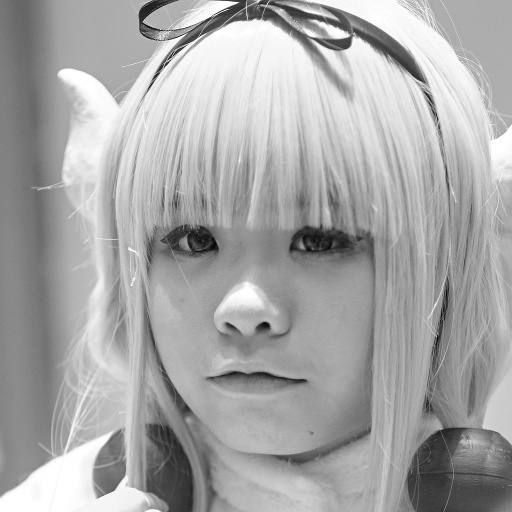

In [4]:
img = cv2.cvtColor(cv2.imread(f"{FFHQ_DIR}/09000/09032.jpg"), cv2.COLOR_BGR2GRAY)
Image.fromarray(img)

In [5]:
axis_0 = scipy.ndimage.convolve1d(img.astype(float), [-1, 1, 0], axis=0)
axis_0 = np.abs(axis_0)

In [6]:
axis_1 = scipy.ndimage.convolve1d(img.astype(float), [-1, 1, 0], axis=1)
axis_1 = np.abs(axis_1)

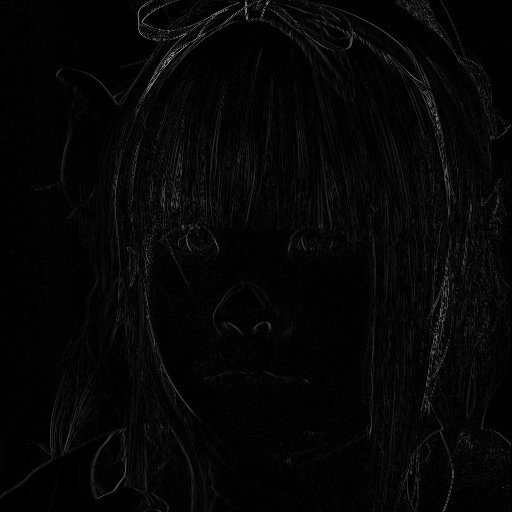

In [7]:
Image.fromarray(axis_1.astype('uint8'))

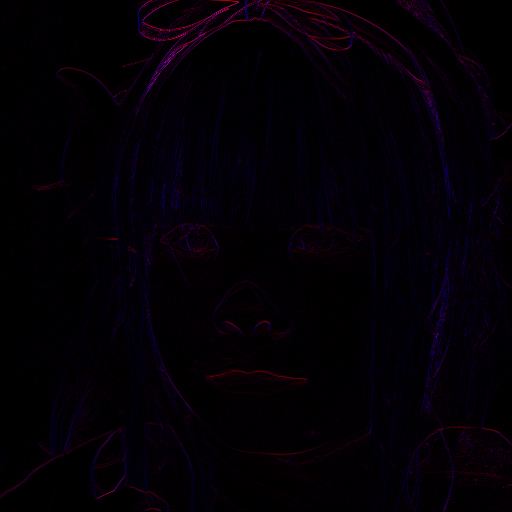

In [10]:
composite = np.dstack([
    axis_0,
    np.zeros_like(axis_0),
    axis_1,
])
Image.fromarray(composite.astype('uint8'))

In [11]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [22]:
oritentation = cv2.boxFilter(adjust_gamma(composite.astype('uint8'), gamma=4), -1, (9, 9))

In [29]:
mask = cv2.cvtColor(cv2.imread(f"{PREPARED_ROOT}/09000/09032.jpg"), cv2.COLOR_BGR2GRAY)
mask = cv2.resize(mask, (512, 512))
oritentation = np.dstack([oritentation, mask])

In [31]:
Image.alpha_composite(oritentation, Image.img)

AttributeError: 'numpy.ndarray' object has no attribute 'load'